In [1]:
import BondGraphTools as bgt
model = bgt.new(name="Reaction with mixed stoichiometry")

In [2]:
K_A=20
K_B=20
K_C=20
K_D=20

R=8.314
T=300

Ce_A = bgt.new("Ce", name="A", library="BioChem", value={'k':K_A , 'R':R, 'T':T})
Ce_B= bgt.new("Ce", name="B", library="BioChem", value={'k':K_B, 'R':R, 'T':T})
Ce_C= bgt.new("Ce", name="C", library="BioChem", value={'k':K_C, 'R':R, 'T':T})
Ce_D= bgt.new("Ce", name="D", library="BioChem", value={'k':K_D, 'R':R, 'T':T})

TF_1_ratio=0.5
TF_1=bgt.new("TF", value=TF_1_ratio)

TF_2_ratio=0.5
TF_2=bgt.new("TF", value=TF_2_ratio)


reaction = bgt.new("Re", library="BioChem", value={'r':None, 'R':R, 'T':T})

zero_junction_1 = bgt.new("0")
zero_junction_2 = bgt.new("0")
zero_junction_3 = bgt.new("0")
zero_junction_4 = bgt.new("0")

one_junction_1 = bgt.new("1")
one_junction_2 = bgt.new("1")

bgt.add(model, Ce_A, Ce_B, Ce_C, Ce_D, TF_1, TF_2, zero_junction_1, zero_junction_2, zero_junction_3, zero_junction_4, one_junction_1, one_junction_2, reaction)

In [3]:
bgt.connect(Ce_A, zero_junction_1)
bgt.connect(zero_junction_1,one_junction_1)
bgt.connect(Ce_B,zero_junction_2)
bgt.connect(zero_junction_2,(TF_1,0))
bgt.connect((TF_1,1),one_junction_1)
bgt.connect(one_junction_1,reaction)
bgt.connect(reaction,one_junction_2)
bgt.connect(one_junction_2,zero_junction_3)
bgt.connect(zero_junction_3,Ce_C)
bgt.connect(one_junction_2,(TF_2,0))
bgt.connect((TF_2,1),zero_junction_4)
bgt.connect(zero_junction_4,Ce_D)

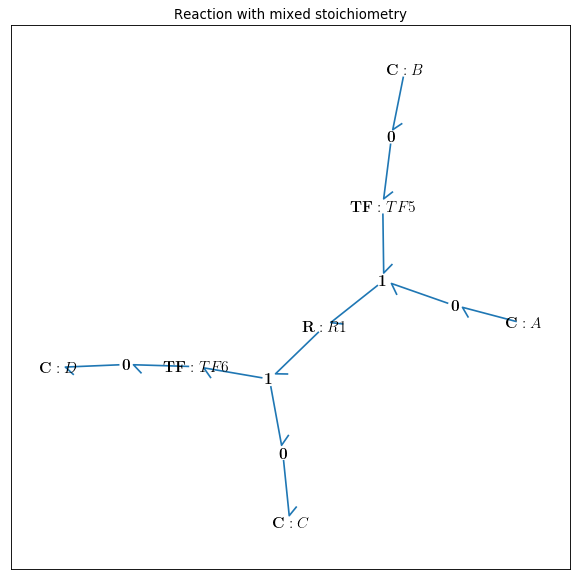

In [5]:
bgt.draw(model)

In [6]:
model.state_vars

{'x_0': (C: A, 'q_0'),
 'x_1': (C: B, 'q_0'),
 'x_2': (C: C, 'q_0'),
 'x_3': (C: D, 'q_0')}

In [7]:
model.constitutive_relations

[dx_0 + 223606797749979*u_0*x_0*sqrt(x_1)/2500000000000 - 8000*u_0*x_2*x_3**2,
 dx_1 + 223606797749979*u_0*x_0*sqrt(x_1)/5000000000000 - 4000*u_0*x_2*x_3**2,
 dx_2 - 223606797749979*u_0*x_0*sqrt(x_1)/2500000000000 + 8000*u_0*x_2*x_3**2,
 dx_3 - 178885438199983*u_0*x_0*sqrt(x_1)/1000000000000 + 16000*u_0*x_2*x_3**2]

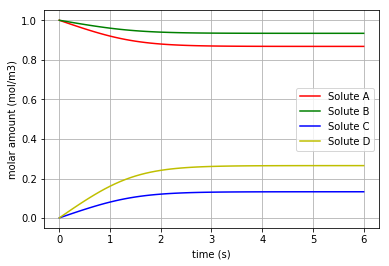

In [8]:
import matplotlib.pyplot as plt
x0 = {"x_0":1, "x_1":1, "x_2":0.001, "x_3":0.001}
t_span = [0,6]
kappa=0.001
t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})

for c, i, label in [('r', 0, 'Solute A'), ('g', 1, 'Solute B'), ('b', 2, 'Solute C'), ('y', 3, 'Solute D')]:    
    plt.plot(t,x[:,i], c, label=label)    
plt.xlabel("time (s)")
plt.ylabel("molar amount (mol/m3)")
plt.legend(loc='center right')
plt.grid()



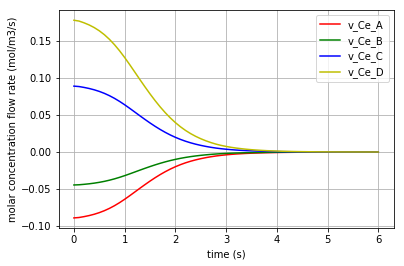

In [10]:
# Calculating the molar concentration flow rate of the solutes
#  dq_Ce_A/dt = v_Ce_A (flow in the Ce_A)
#  dq_Ce_B/dt = v_Ce_B (flow in the Ce_B)
#  dq_Ce_C/dt = v_Ce_C (flow in the Ce_C)
#  dq_Ce_D/dt = v_Ce_D (flow in the Ce_D)

import matplotlib.pyplot as plt
import numpy as np

for c, i, label in [('r', 0, 'v_Ce_A'), ('g', 1, 'v_Ce_B'), ('b', 2, 'v_Ce_C'), ('y', 3, 'v_Ce_D')]:
    f = np.array(x[:,i], dtype=float)
    slope=np.gradient(f,0.1)
    
    plt.plot(t,slope, c, label=label)        
    
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("molar concentration flow rate (mol/m3/s)")
plt.grid()    
plt.show()


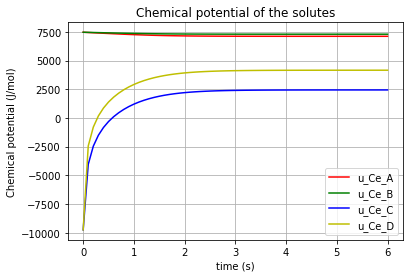

In [11]:
# Calculating & plotting the solutes chemical potentials (u_Ce_A & u_Ce_B & u_Ce_C & u_Ce_D)
# for kappa=0.001

for c, i, k, label in [('r',0,K_A,'u_Ce_A'), ('g',1,K_B,'u_Ce_B'), ('b',2,K_C,'u_Ce_C'), ('y',3,K_D,'u_Ce_D')]:
    q= np.array(x[:,i], dtype=float)
    u=R*T*np.log(k*q)
    plt.plot(t,u, c, label=label)

plt.legend(loc='lower right')
plt.xlabel("time (s)")
plt.ylabel("Chemical potential (J/mol)")
plt.title('Chemical potential of the solutes')
plt.grid()   


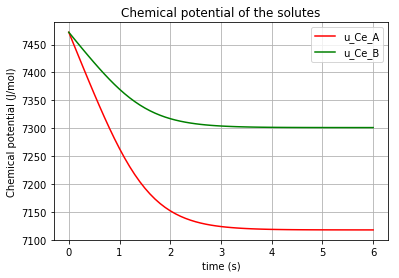

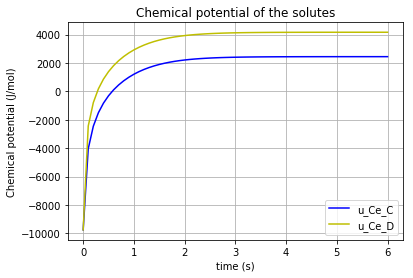

In [13]:
# Each pair of potentials in a figure (for scaling purpose)

for c, i, k, label in [('r',0,K_A,'u_Ce_A'), ('g',1,K_B,'u_Ce_B')]:
    q= np.array(x[:,i], dtype=float)
    u=R*T*np.log(k*q)
    plt.plot(t,u, c, label=label)
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("Chemical potential (J/mol)")
plt.title('Chemical potential of the solutes')
plt.grid()   
plt.show()

for c, i, k, label in [('b',2,K_C,'u_Ce_C'), ('y',3,K_D,'u_Ce_D')]:
    q= np.array(x[:,i], dtype=float)
    u=R*T*np.log(k*q)
    plt.plot(t,u, c, label=label)
plt.legend(loc='lower right')
plt.xlabel("time (s)")
plt.ylabel("Chemical potential (J/mol)")
plt.title('Chemical potential of the solutes')
plt.grid()   
plt.show()